In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pypfopt import risk_models as RiskModels
import datetime
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
%matplotlib inline
# portfolio optimizationのライブラリを使用
# https://pyportfolioopt.readthedocs.io/en/latest/
assetNames = ['EURO', 'AUL', 'CAN','FRA','GER','JAP', 'USA']
fileNames = ['EZU','EWA' ,'EWC','EWQ','EWG','EWJ', '^GSPC']

In [2]:
prices = pd.read_csv('price.csv', index_col=0)
prices = prices["2000-08-01":datetime.datetime.now().strftime('%Y-%m-%d')]

In [3]:
semi_covariance = RiskModels.semicovariance(prices)
sample_covariance = RiskModels.sample_cov(prices)
shrunk_covariance = RiskModels.CovarianceShrinkage(prices)
shrunk_covariance = shrunk_covariance.shrunk_covariance()
covariances = [semi_covariance, sample_covariance, shrunk_covariance]

In [4]:
weight_set = []
P = np.array([
        [-0.3,-0.1,-0.2,-0.2,-0.1,-0.1,1],# アメリカが他よりも3%回復する
        [0,0,0,0,0,1,0]]) # 日本は1%回復する
Q = np.array([[0.0003],[0.001]]) # 2-vector
# リスクプレミアムはS&P 500から取ってきている
delta = black_litterman.market_implied_risk_aversion(prices["USA"])
for Sigma in covariances:
    Omega = BlackLittermanModel.default_omega(cov_matrix = Sigma, P = P, tau = 0.05)
    bl = BlackLittermanModel(Sigma, P = P, Q = Q, omega = Omega)
    rets = bl.bl_returns()
    ef = EfficientFrontier(rets, Sigma)
    bl.bl_weights(delta)
    weights = bl.clean_weights()
    weight_set.append(weights)

/usr/local/lib/python3.7/site-packages/pypfopt/black_litterman.py:252: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


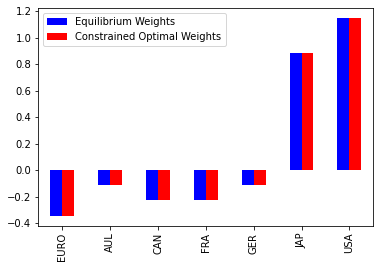

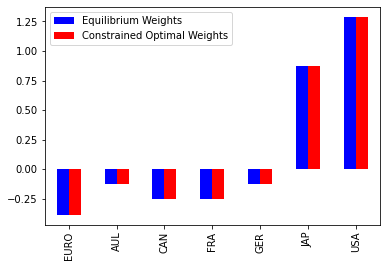

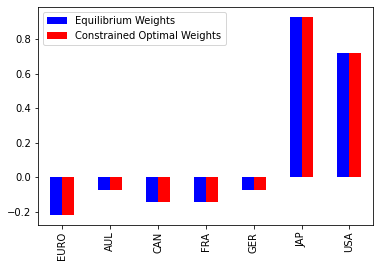

In [111]:
for weight in weight_set:
    df = pd.DataFrame(weight,
                      columns=assetNames,
                      index=['Equilibrium Weights','Constrained Optimal Weights'])
    df.T.plot(kind='bar', color='br')

In [11]:
usd_sum = 0
for pair in {'JPY': 10139.4, 'NZD': 128.0734, 'USD': 455, 'GBP': 67.3946, 'HKD': 710.9739, 'BRL': 301.4375}.items():
    usd_cur = pair[1]
    if  pair[0] != "USD":
        usd_cur /= new_record.loc[0, pair[0]]
    print(usd_cur)
    usd_sum +=  usd_cur
usd_sum

92.4115931461903
86.0245835572273
455
85.94057638357562
90.78039531142265
77.66405585757349


887.8212042559894

In [5]:
new_record = pd.DataFrame({'Date': ["20190101"], 'JPY': [109.72], 'NZD': [1.4888], "AUD" : [1.4178], "EUR" : [0.8722], "GBP" : [0.7842], "HKD" : [7.8318], "BRL" : [3.8813], "DKK" : [6.5128], "INR" : [69.453], "CAD" : [1.3639], "CHF" : [0.9816]})

In [6]:
new_record

,Date,JPY,NZD,AUD,EUR,GBP,HKD,BRL,DKK,INR,CAD,CHF
0,20190101,109.72,1.4888,1.4178,0.8722,0.7842,7.8318,3.8813,6.5128,69.453,1.3639,0.9816
